In [20]:
import numpy as np
from numpy import random 
import math
import time 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import cm


In [21]:
random.seed(seed=1234)
class LinearRegression(object):
    def __init__(self, eta=0.01, n_iter=25):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.random.randn(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors) #X.T.dot(errors) is the Gradient Descent of the Cost function. 
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [22]:
lr = LinearRegression()

In [23]:
#Two Independent Variables Example: 

n = 50  # Number of data points
X = np.random.randint(0,10,(n,2))  # Independent variables
y = 2 * X[:,0] + 3 * X[:,1] + np.random.randn(n)* 0.5  # Dependent variable (target)
X.shape, y.shape

((50, 2), (50,))

In [24]:
X,y

(array([[3, 6],
        [5, 4],
        [8, 9],
        [1, 7],
        [9, 6],
        [8, 0],
        [5, 0],
        [9, 6],
        [2, 0],
        [5, 2],
        [6, 3],
        [7, 0],
        [9, 0],
        [3, 2],
        [3, 1],
        [3, 1],
        [3, 7],
        [1, 7],
        [4, 0],
        [5, 1],
        [5, 9],
        [9, 4],
        [0, 9],
        [8, 8],
        [6, 8],
        [6, 3],
        [1, 2],
        [5, 2],
        [5, 6],
        [7, 4],
        [3, 5],
        [6, 4],
        [6, 2],
        [4, 2],
        [7, 9],
        [7, 7],
        [2, 9],
        [7, 4],
        [9, 0],
        [9, 2],
        [9, 1],
        [2, 9],
        [1, 5],
        [7, 4],
        [7, 7],
        [1, 4],
        [0, 5],
        [4, 9],
        [2, 9],
        [1, 3]]),
 array([24.14967352, 22.06363862, 43.46309498, 24.22761994, 35.83955492,
        15.84418667, 10.06548094, 36.13139275,  4.51188225, 15.96870247,
        20.40884985, 13.82762463, 17.87725467, 11.48

In [25]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
y_std = sc.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegression()
lr.fit(X_std, y_std)

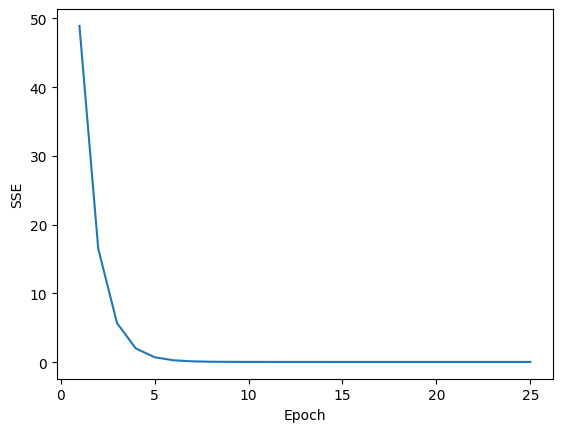

SSE: 0.047105629372765676


In [26]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()
print(f"SSE: {lr.cost_[-1]}")

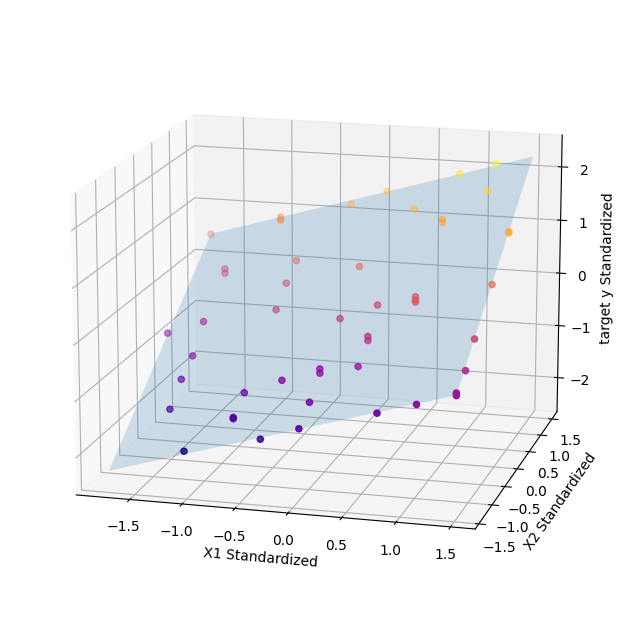

In [27]:
depths = lr.predict(X)

X1 = X_std[:,0]
X2 = X_std[:,1]
# Create a meshgrid for the plane visualization
X1_range = np.linspace(min(X1), max(X1), 10)
X2_range = np.linspace(min(X2), max(X2), 10)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
Z_mesh = lr.predict(np.array([X1_mesh.flatten(), X2_mesh.flatten()]).T).reshape(X1_mesh.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(X1,X2, y_std, c=depths, cmap=cm.plasma)

# Plot the regression plane
ax.plot_surface(X1_mesh, X2_mesh, Z_mesh, alpha=0.2, shade=True)

# Set labels for the axes
ax.set_xlabel('X1 Standardized')
ax.set_ylabel('X2 Standardized')
ax.set_zlabel('target y Standardized')
ax.view_init(elev=15, azim=285)  # Set the elevation and azimuth angles
plt.show()


In [28]:
print(f"Our final Weights: w0 = {lr.w_[0]}, w1 = {lr.w_[1]}, w3 = {lr.w_[2]}")

Our final Weights: w0 = -1.1710280499536108e-08, w1 = 0.5591910414793612, w3 = 0.939469924933433


In [29]:
#One Independent Variable Example: 

X = np.array([0,1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y = np.array([1,3,5,4,7,5,8,9,11,10,13])

In [30]:
X_std = sc.fit_transform(X)
y_std = sc.fit_transform(y[:, np.newaxis]).flatten()
lr.fit(X_std, y_std)

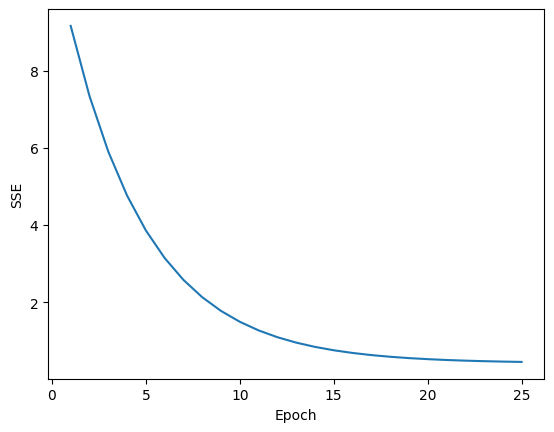

SSE: 0.459064213350244


In [31]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()
print(f"SSE: {lr.cost_[-1]}")

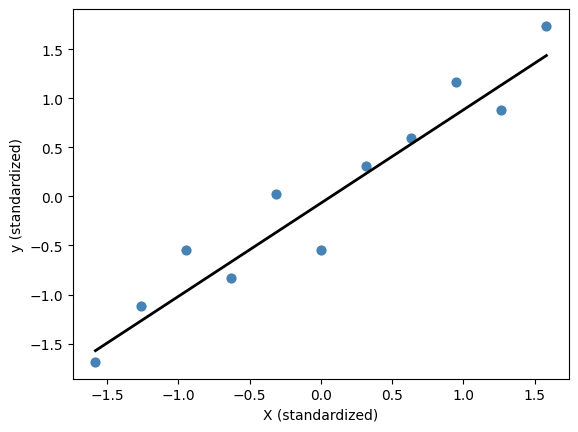

In [32]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

lin_regplot(X_std, y_std, lr)
plt.xlabel('X (standardized)')
plt.ylabel('y (standardized)')
plt.show()

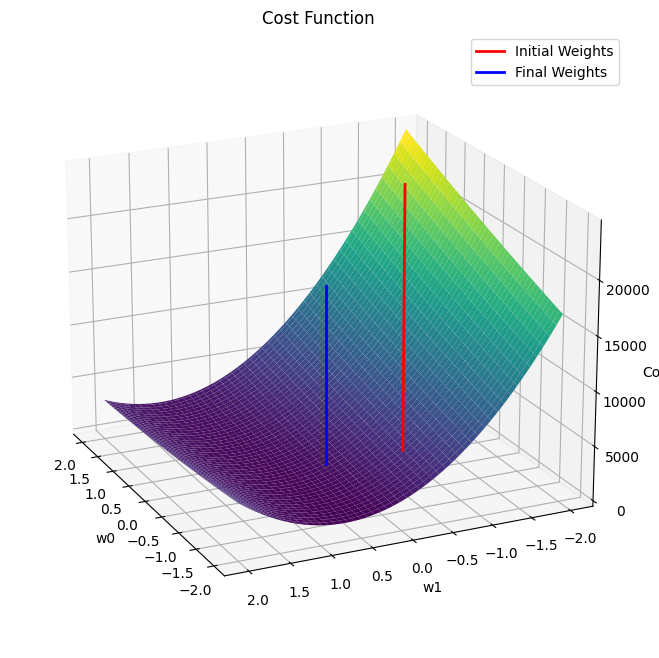

In [33]:
import numpy as np
import matplotlib.pyplot as plt
random.seed(seed=1234)

# Define the range for w0 and w1
w0_range = np.linspace(-2, 2, 100)
w1_range = np.linspace(-2, 2, 100)
w0, w1 = np.meshgrid(w0_range, w1_range)

# Calculate the cost function for each combination of w0 and w1
cost_f = np.zeros_like(w0)
for i in range(len(w0_range)):
    for j in range(len(w1_range)):
        errors = (y  - w1[i, j] * X) + w0[i, j] 
        cost_f[i, j] = (errors ** 2).sum() / 2.0

w_i = np.random.randn(1 + X.shape[1]) #initial random weights used in our model.
w0_i = int(w_i[0])
w1_i = int(w_i[1])

w0_f = int(lr.w_[0])
w1_f = int(lr.w_[1])

# Plot the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(w0, w1, cost_f, cmap='viridis')
ax.plot([w0_i, w0_i], [w1_i, w1_i], [0, cost_f[w0_i, w1_i]], color='red', linewidth=2, label='Initial Weights', zorder=10)
ax.plot([w0_f, w0_f], [w1_f, w1_f], [0, cost_f[w0_f, w1_f]], color='blue', linewidth=2, label='Final Weights', zorder=10)

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function')
ax.view_init(elev=20, azim=155)  # Set the elevation and azimuth angles



ax.legend()

# Show the plot
plt.show()


In [34]:
print(f"Initial weights w0 = {w_i[0]}, w1 = {w_i[1]}")
print(f"final weights w0 = {lr.w_[0]}, w1 = {lr.w_[1]}")

Initial weights w0 = 0.47143516373249306, w1 = -1.1909756947064645
final weights w0 = -0.06782704095238178, w1 = 0.9516451667185597
